## Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Distribution of target

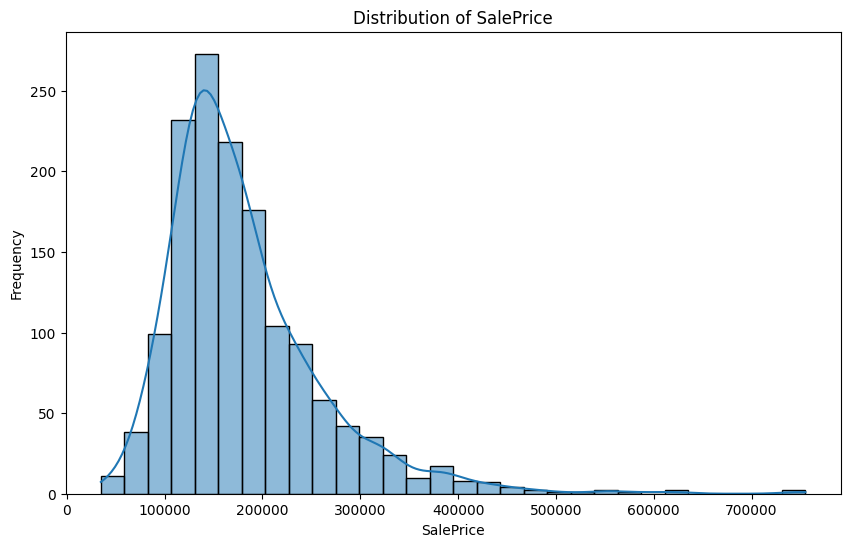

In [ ]:
# Plot the distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

## Analyze categorical variables

In [ ]:
categorical_vars = housing_df.select_dtypes(include=['object']).columns
categorical_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

For each categorical feature, we made two plots in a row. A count plot is made on the left, showing the distribution of the categorical feature. A boxplot is made on the right, showing the relationship with the target.

In [ ]:
# Plot the distribution of each categorical variable + SalePrice distribution
for var in categorical_vars:
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    housing_df[var] = housing_df[var].fillna('NaN')

    # Countplot
    sns.countplot(data=housing_df, x=var, ax=ax[0])
    ax[0].set_xlabel(var)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)

    # Boxplot for SalePrice by category
    sns.boxplot(data=housing_df, x=var, y='SalePrice', ax=ax[1])
    ax[1].set_xlabel(var)
    ax[1].set_ylabel('SalePrice')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Analyze numerical variables

1. We obtained the numerical variable columns.
2. We computed the correlation matrix and plot it.
3. We obtained the top 10 features that are highly correlated with the target.
4. We made a scatterplot matrix. We also plot the distribution and the relationship with the target for each 10 numerical variable.

In [ ]:
numerical_vars = housing_df.select_dtypes(include=['int64', 'float64']).columns
numerical_vars

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

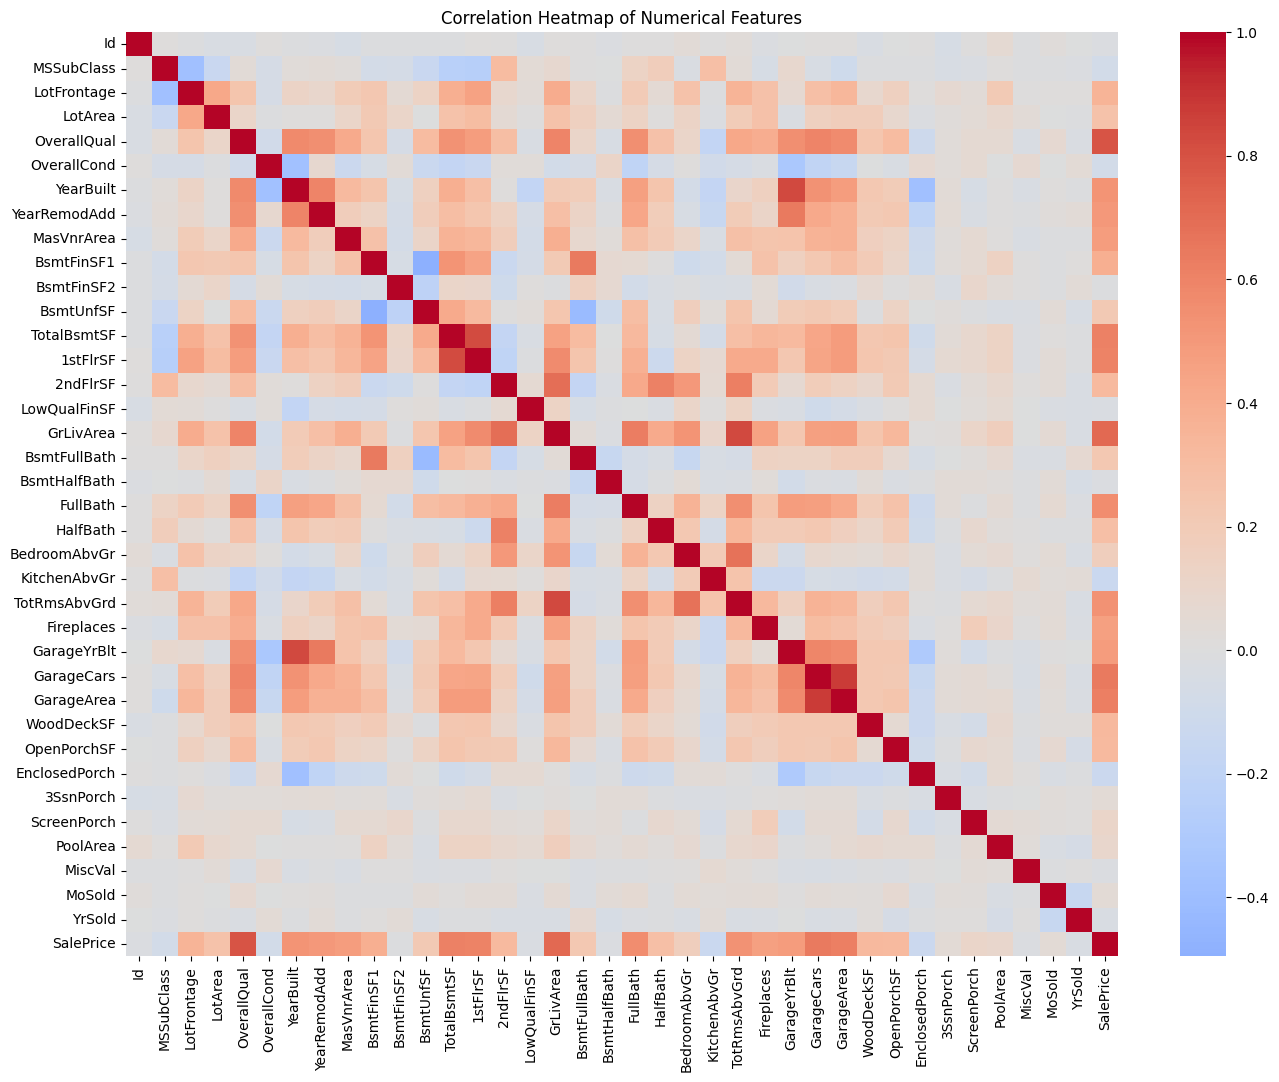

In [ ]:
# Calculate correlations with SalePrice
corr_matrix = housing_df[numerical_vars].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Get top 10 correlated features with SalePrice
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).drop('SalePrice')

top_features = top_corr.index
top_features

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

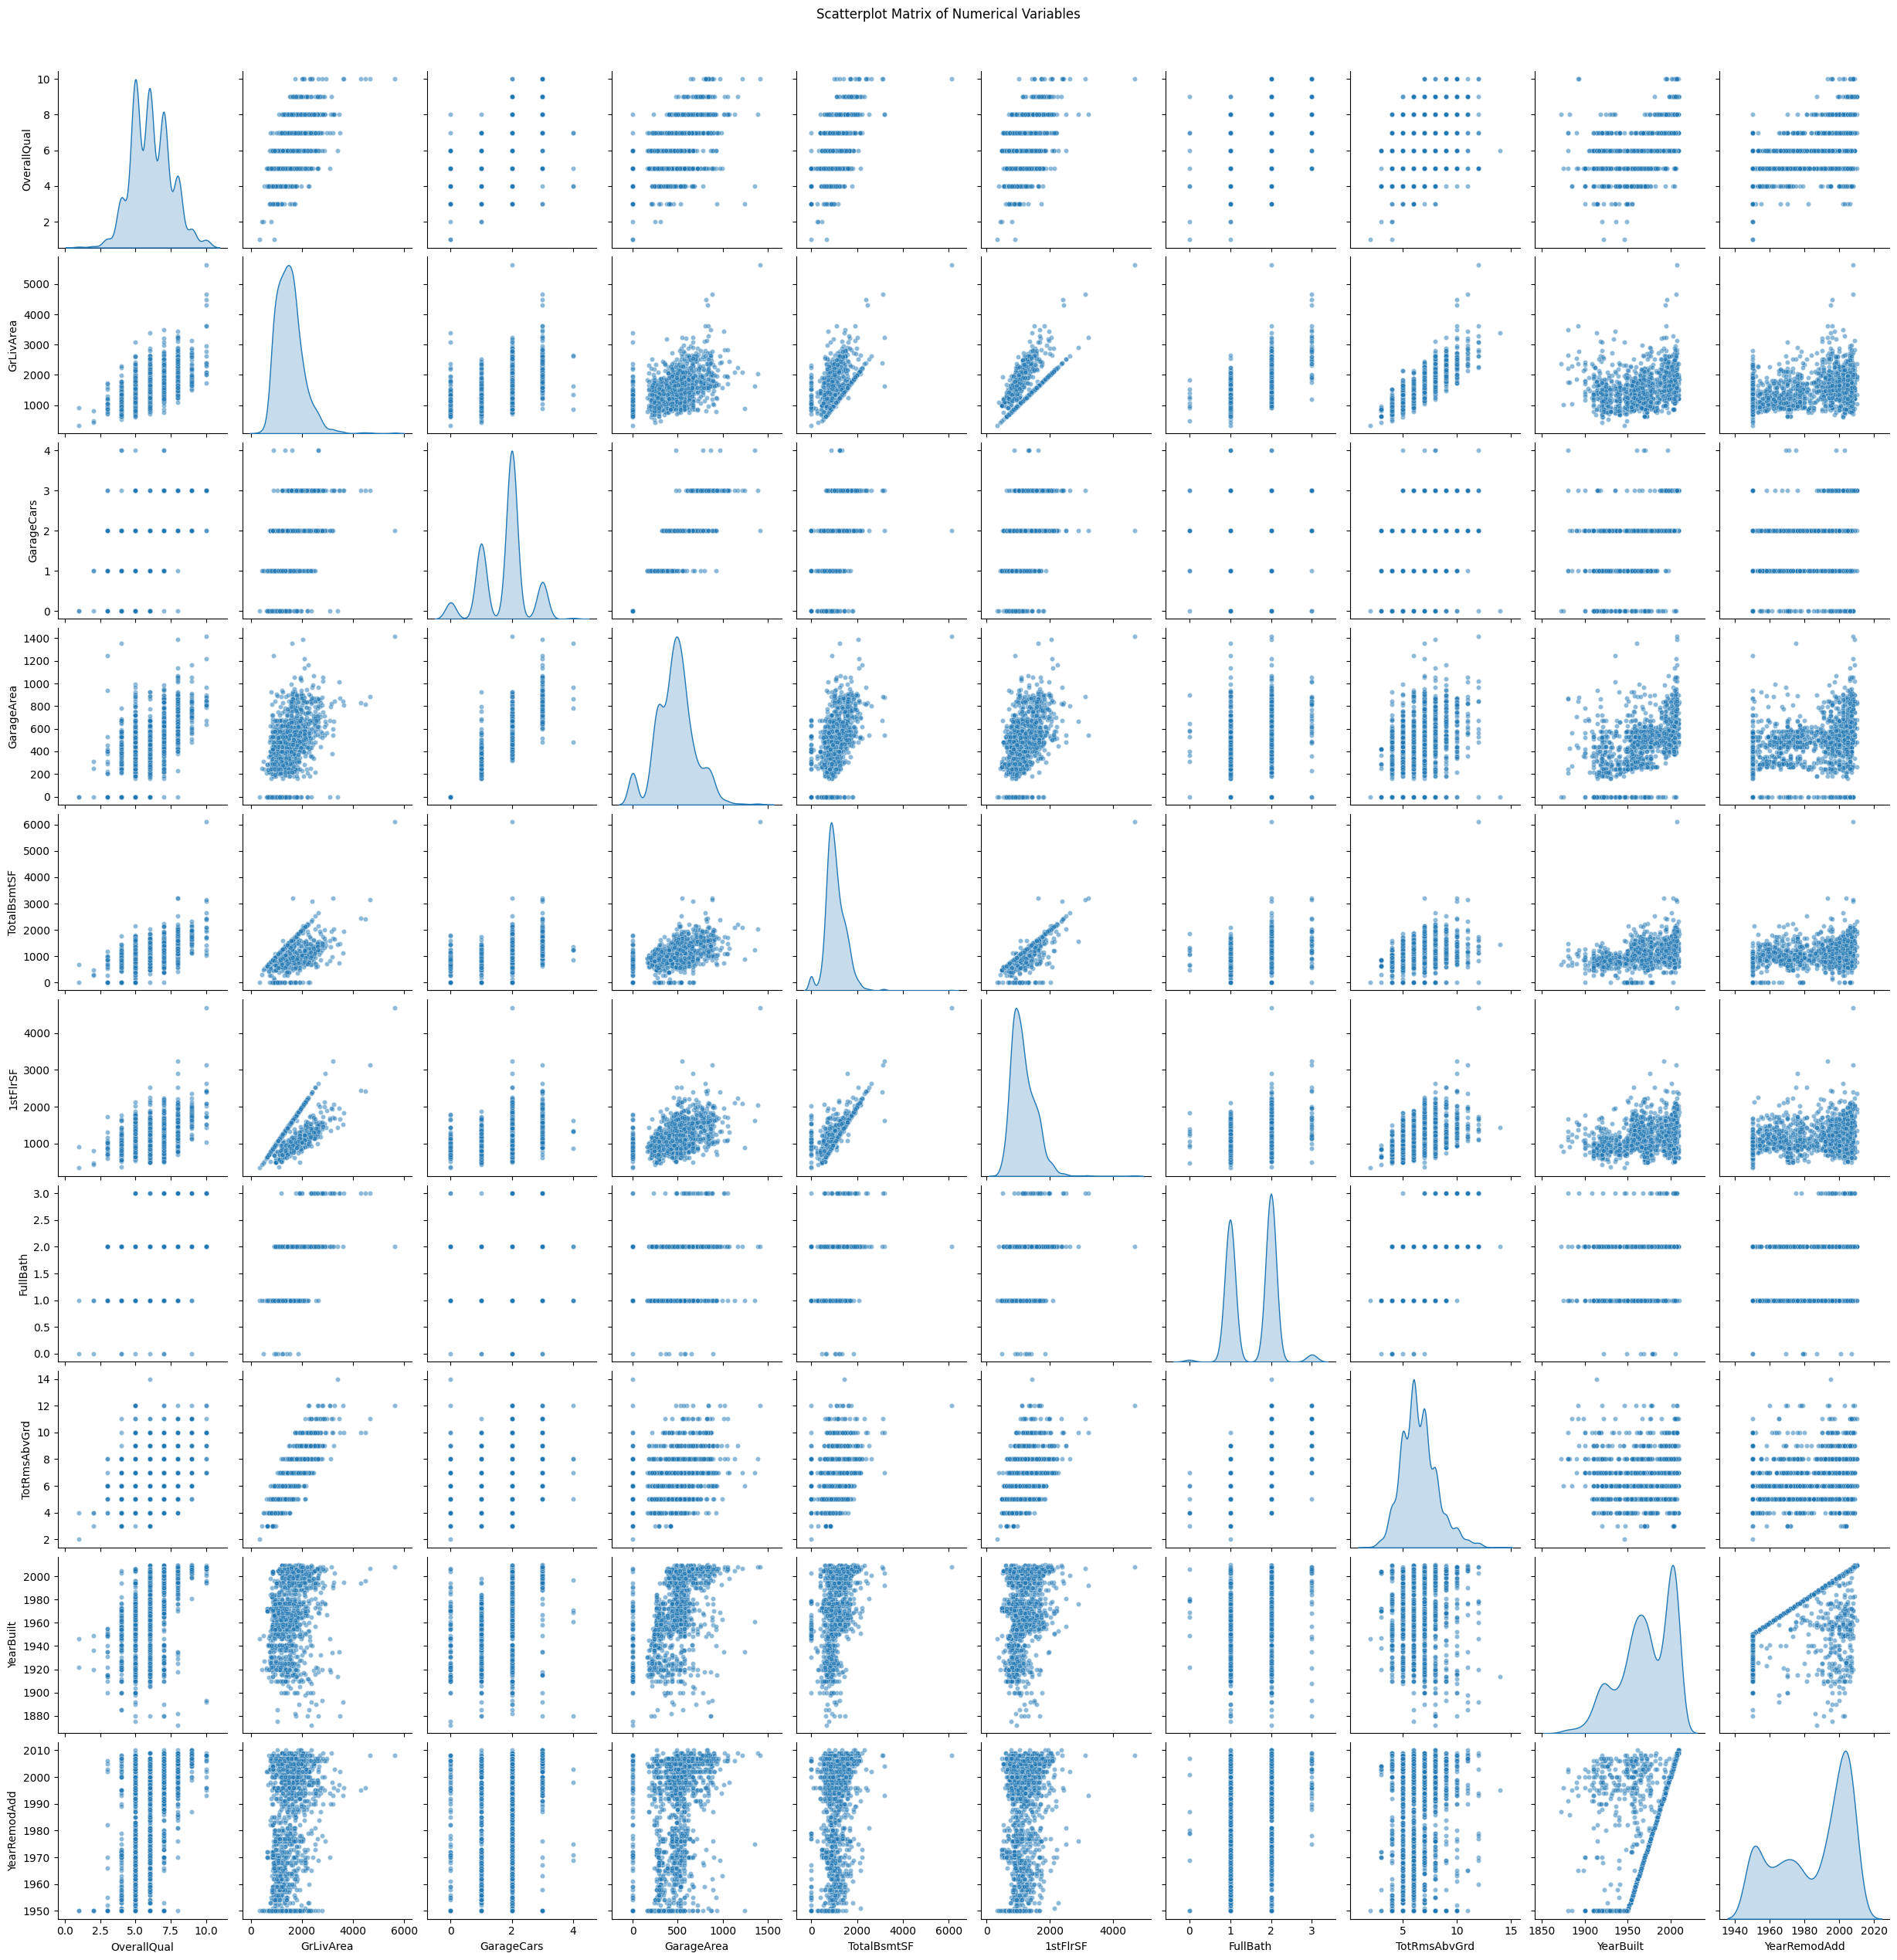

In [ ]:
sns.pairplot(housing_df[top_features], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Scatterplot Matrix of Numerical Variables', y=1.02)
plt.show()

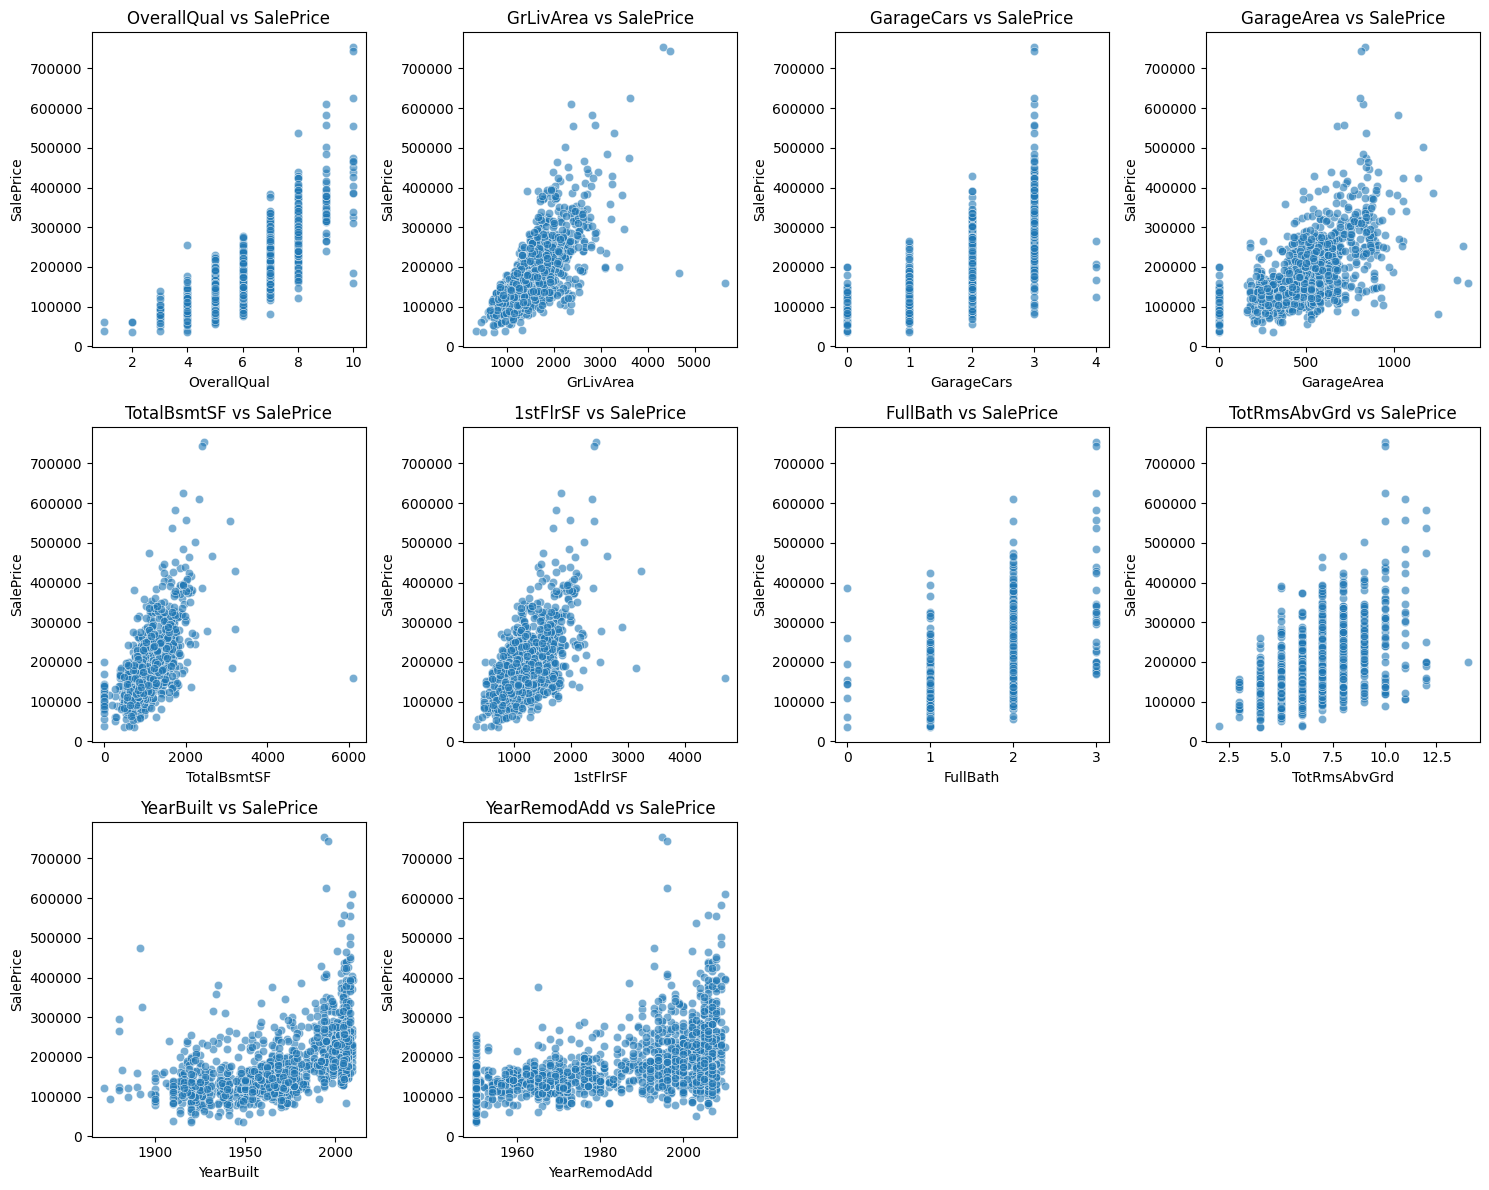

In [ ]:
# Plot scatterplots

plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(data=housing_df, x=feature, y='SalePrice', alpha=0.6)
    plt.title(f'{feature} vs SalePrice')
    plt.tight_layout()
plt.show()

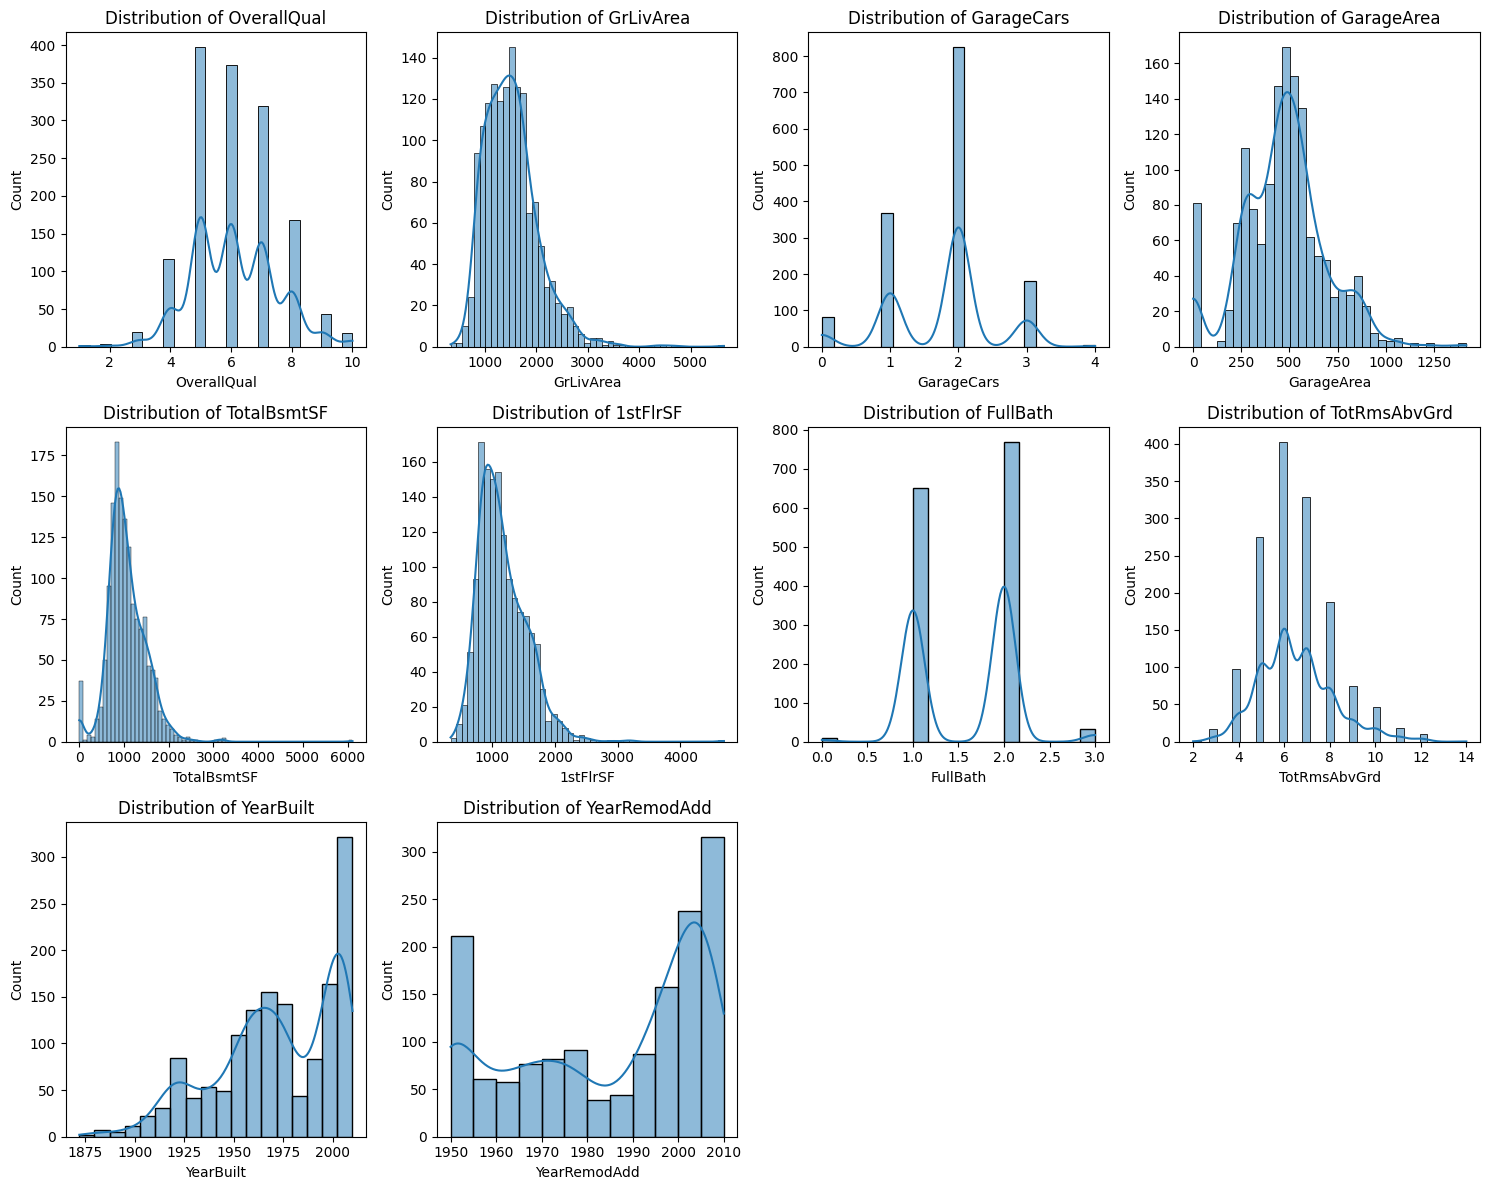

In [ ]:
# Plot distributions of these numerical variables

plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(housing_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

## Some selected features

We visualize the relationship between `YearBuilt` and the target using scatterplot, and we visualize another categorical variable at the same time using color.

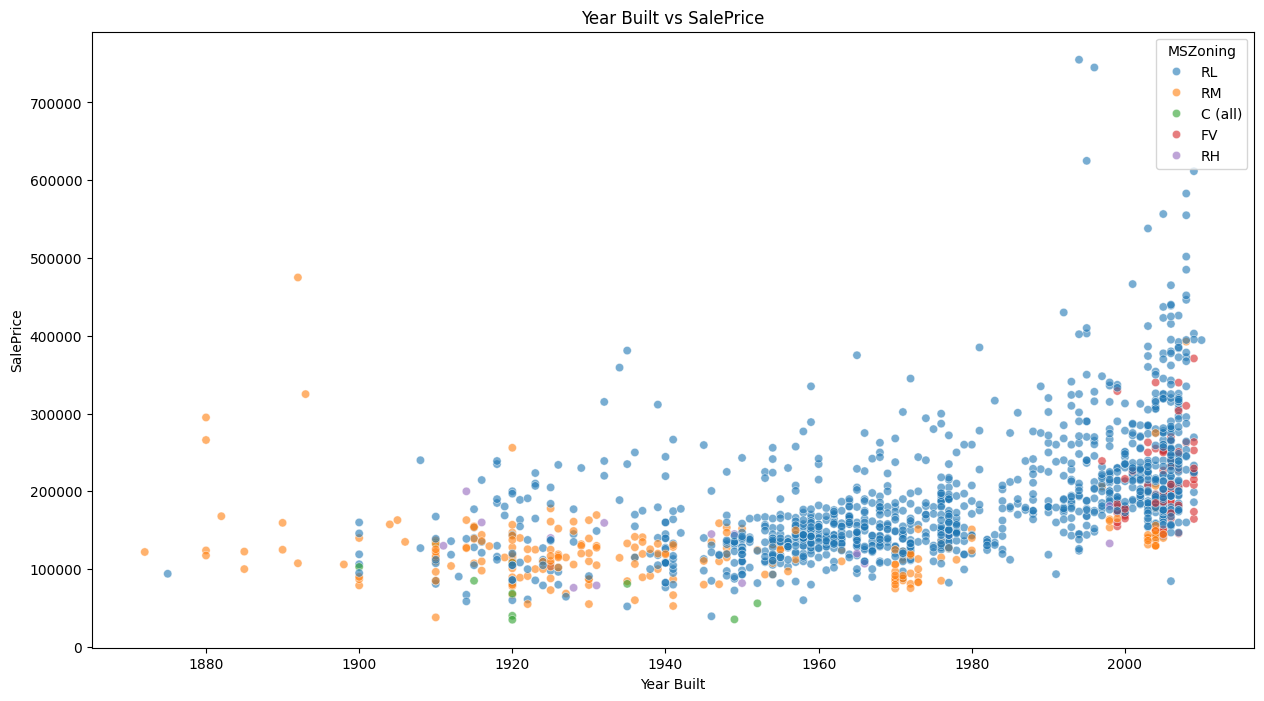

In [ ]:
plt.figure(figsize=(15, 8))
# feel free to change hue= to other categorical variables
sns.scatterplot(data=housing_df, x='YearBuilt', y='SalePrice', hue='MSZoning',alpha=0.6)
plt.title('Year Built vs SalePrice')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()

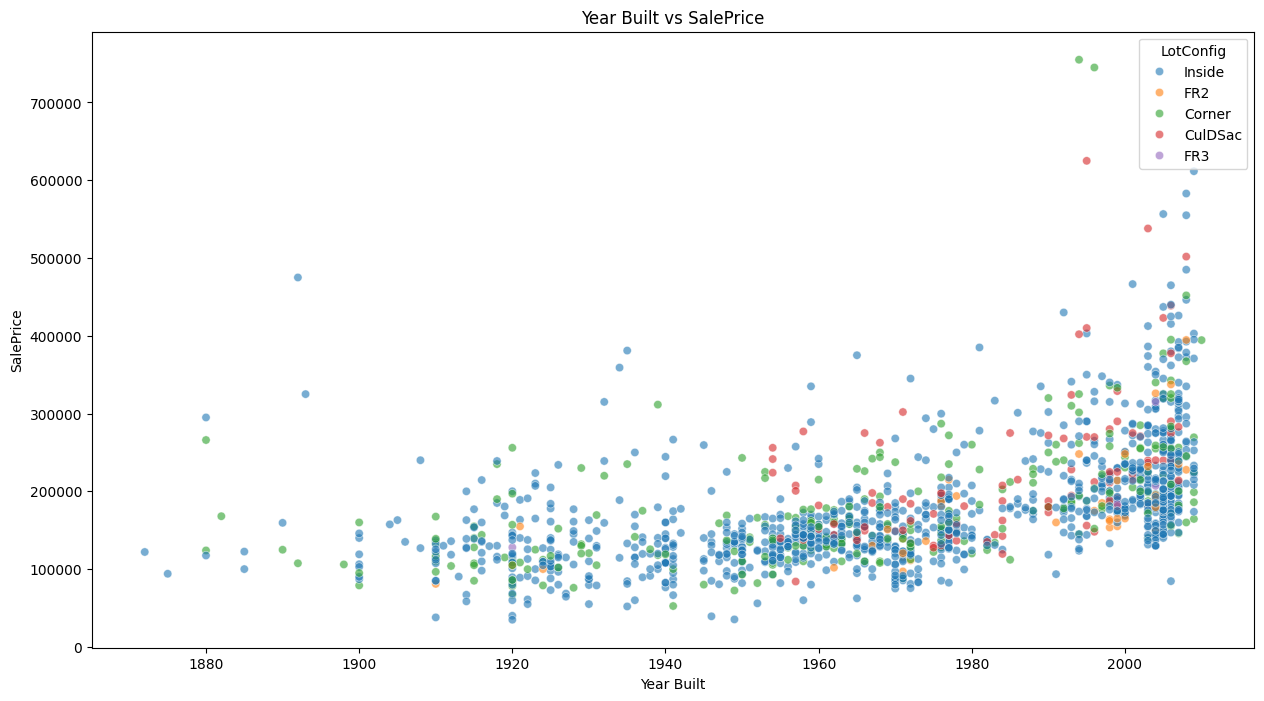

In [ ]:
plt.figure(figsize=(15, 8))
# feel free to change hue= to other categorical variables
sns.scatterplot(data=housing_df, x='YearBuilt', y='SalePrice', hue='LotConfig',alpha=0.6)
plt.title('Year Built vs SalePrice')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()

We compare `OverallQual` and `OverallCond` with the target using boxplots.

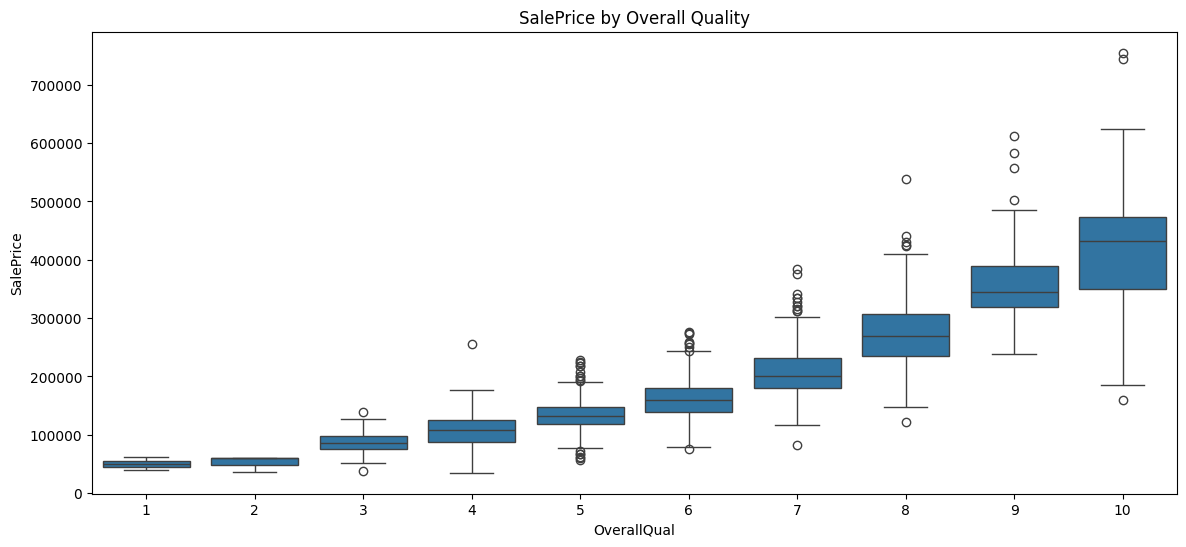

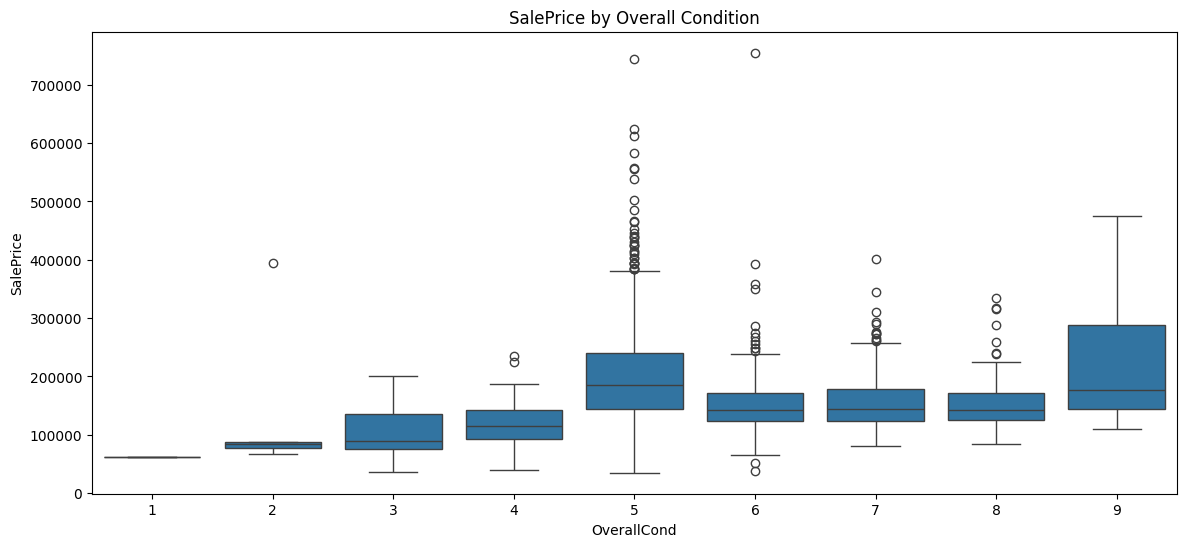

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=housing_df, x='OverallQual', y='SalePrice')
plt.title('SalePrice by Overall Quality')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=housing_df, x='OverallCond', y='SalePrice')
plt.title('SalePrice by Overall Condition')
plt.show()